## Building a model for "Insurance costs prediction"--

Importing of Packages --

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

Read the data file --

In [2]:
def read_data():
    path="C:/top mentor data sci assignmets/21 may/Regression assignment"
    filename="/insurance.csv"
    data=pd.read_csv(path+filename)
    return data

print("Calling read_data function--")
data=read_data()
print(data)

Calling read_data function--
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
data.shape

(1338, 7)

print basic info about data --

In [4]:
print(data.columns)
print("-------------------------------------------")
print(data.dtypes)
print("-------------------------------------------")
print(data.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
-------------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Insights of data --

In [5]:
print('1.minimum age of primary beneficiary is',data["age"].min())
print('2.Maximun age of primary beneficiary is',data["age"].max())
print('3.Maximun Number of dependents are',data["children"].max())
print("4.Ideal BMI ranges between 18.5 to 24.9, No of beneficiaries whose BMI is ideal are",
      len(data[data["bmi"].between(18.5,24.9)]))
print("5.Percentages of beneficiaries having BMI above 24.9 are",(len(data[data["bmi"]>24.9])/1338)*100)
print('6.Average medical cost billed by health insurance is around',data["charges"].mean())
print("7.The beneficiary's residential area in the US are",data["region"].unique())

1.minimum age of primary beneficiary is 18
2.Maximun age of primary beneficiary is 64
3.Maximun Number of dependents are 5
4.Ideal BMI ranges between 18.5 to 24.9, No of beneficiaries whose BMI is ideal are 222
5.Percentages of beneficiaries having BMI above 24.9 are 81.91330343796712
6.Average medical cost billed by health insurance is around 13270.422265141257
7.The beneficiary's residential area in the US are ['southwest' 'southeast' 'northwest' 'northeast']


Checking for missing values --

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<AxesSubplot:>

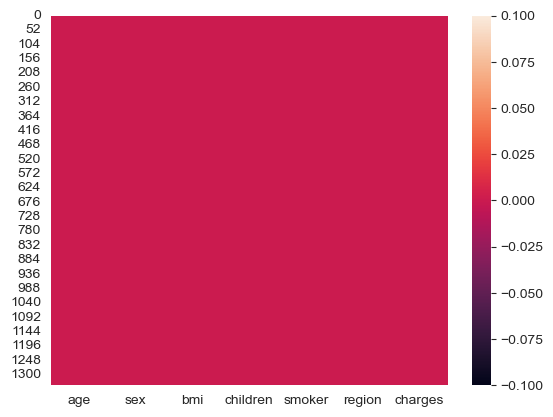

In [6]:
print(data.isnull().sum())
sns.heatmap(data.isnull())

There are no missing values.

#### Exploratory Data Analysis --

checking for outliers--

<AxesSubplot:>

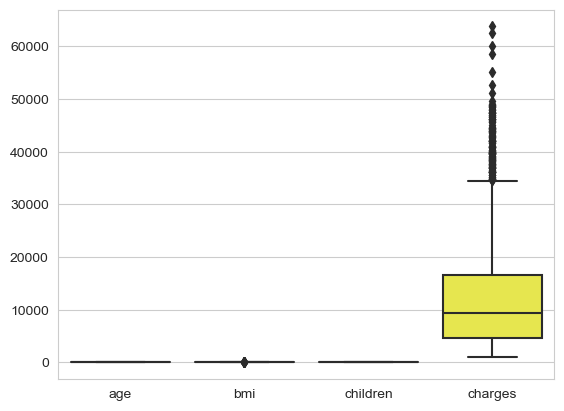

In [7]:
sns.boxplot(data=data.loc[:, ['age', 'bmi', 'children', 'charges']],palette="hot")

Charges will vary for individuals ,hence charges column is showing outliers.

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1.5158796580240388


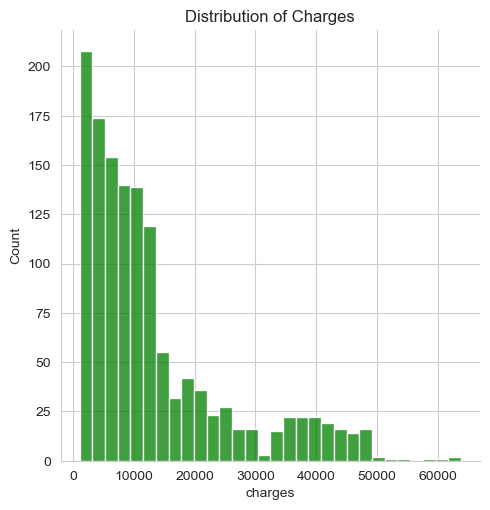

In [9]:
sns.displot(x=data["charges"],color="g")
plt.title("Distribution of Charges")
print(data["charges"].skew())

smoker
no     1064
yes     274
Name: sex, dtype: int64


Text(0.5, 1.0, 'Percentages of Smokers')

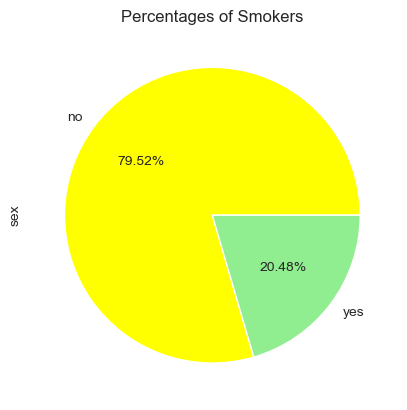

In [10]:
data.groupby(["smoker"])["sex"].count().plot(kind="pie",colors=["yellow","lightgreen"],autopct='%.2f%%')
print(data.groupby(["smoker"])["sex"].count())
plt.title("Percentages of Smokers")

Around 20.48% of beneficiaries are smokers.

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


Text(0.5, 1.0, 'Sex v/s Smokers')

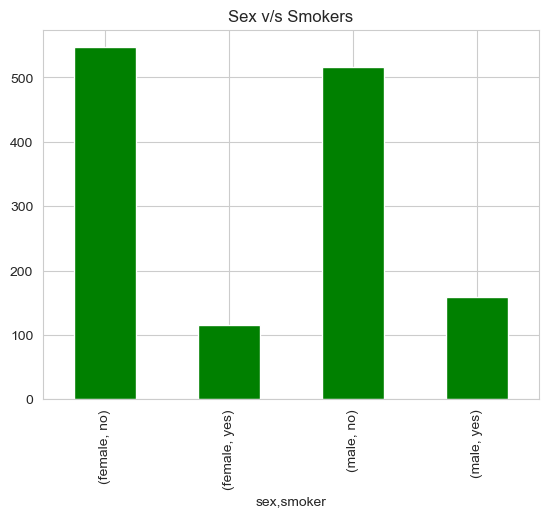

In [11]:
print(data.groupby(["sex","smoker"]).size())
data.groupby(["sex","smoker"]).size().plot(kind="bar",color="g")
plt.title("Sex v/s Smokers")

From above analysis we can say that among our beneficiaries count of smoker male beneficiaries is slightly high than females.

Text(0.5, 1.0, 'Age v/s Charges')

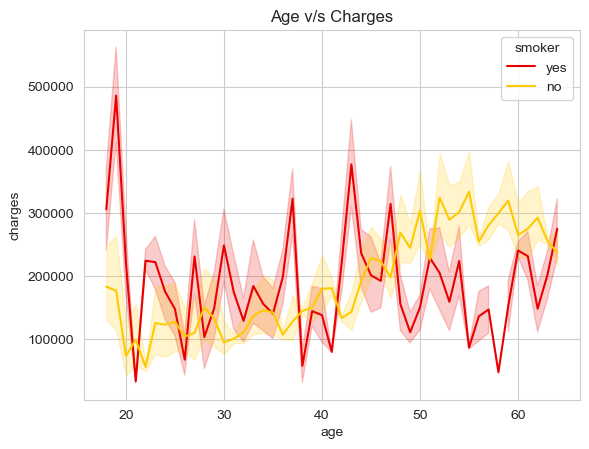

In [12]:
sns.lineplot(x="age",y="charges",data=data,hue="smoker",estimator="sum",palette='hot')
plt.title("Age v/s Charges")

Text(0.5, 1.0, 'Age v/s Charges')

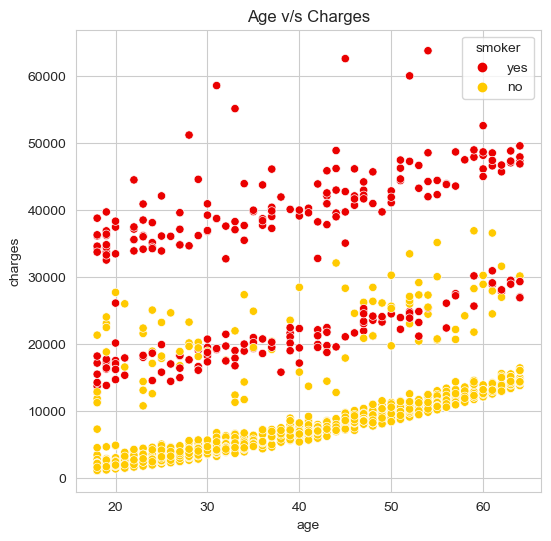

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="age",y="charges",data=data,hue="smoker",palette="hot")
plt.title("Age v/s Charges")

From above plots we can infer that the overall charges are relatively higher for smoker beneficiaries, irrespective of age.<br>
alternatively, non-smoker beneficiaries are getting less charged.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


Text(0.5, 1.0, 'No of Dependents')

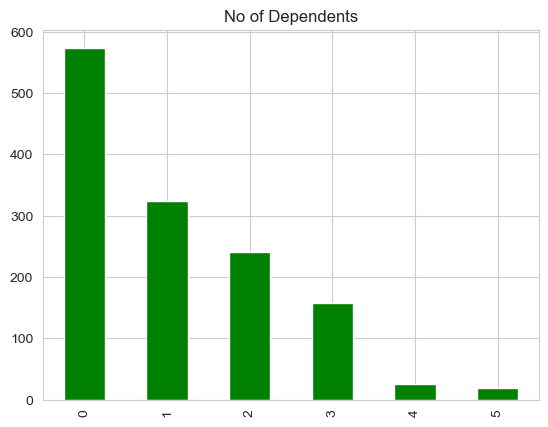

In [14]:
print(data["children"].value_counts())
data["children"].value_counts().plot(kind="bar",color="g")
plt.title("No of Dependents")

Maximum no of beneficiaries have no dependents.

<AxesSubplot:xlabel='children', ylabel='charges'>

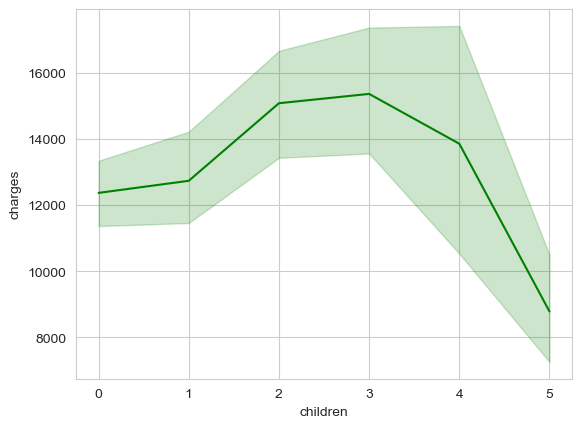

In [15]:
sns.lineplot(x="children",y="charges",data=data,color="g")

Overall, beneficiaries having dependents are charged more than those having no dependents.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Residential area of beneficiaries')

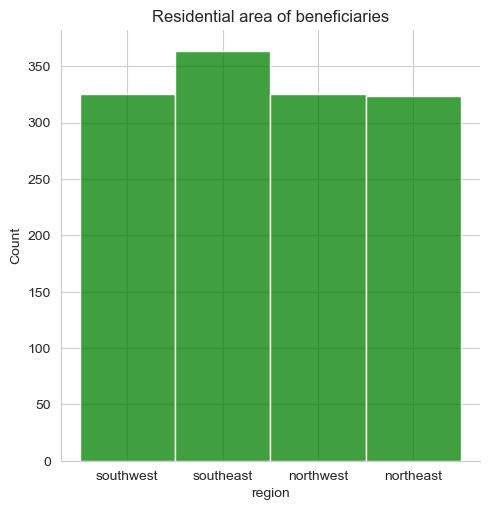

In [16]:
print(data["region"].value_counts())
sns.displot(x=data["region"],color="g")
plt.title("Residential area of beneficiaries")

Southeast region is slightly more populated with beneficiaries.

Skewness-- 0.2840471105987448
Mean BMI-- 30.663396860986538


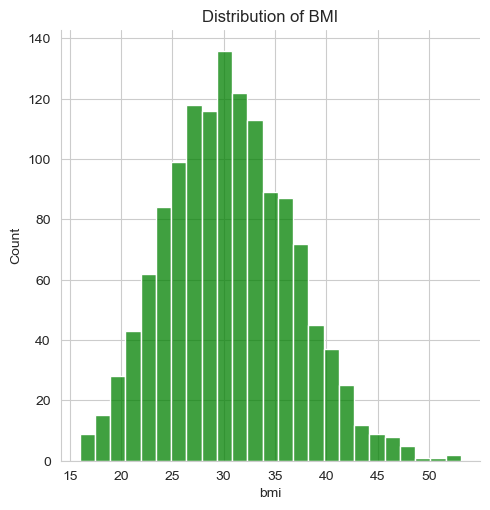

In [17]:
sns.displot(x=data["bmi"],color="g")
plt.title("Distribution of BMI")
print("Skewness--",data["bmi"].skew())
print("Mean BMI--",data["bmi"].mean())

Here, BMI is evenly distributed with mean BMI of 30.66 but ideally it should  range between 18.5 to 24.9.

Text(0.5, 1.0, '    BMI v/s Charges')

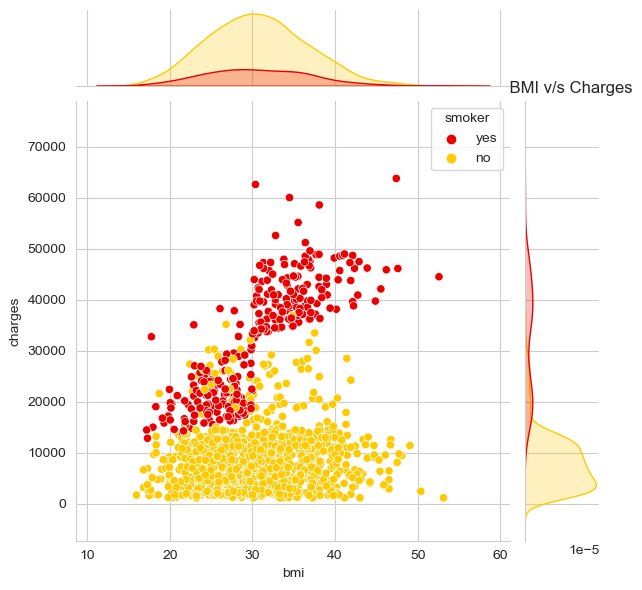

In [18]:
sns.jointplot(x="bmi",y="charges",data=data,hue="smoker",palette='hot')
plt.title("    BMI v/s Charges")

From above jointplot we can observe that if BMI is above ideal range (18.5,24.9) but beneficiary is non-smoker,charges might increase <br> however,if beneficiary is having high BMI as well is a smoker then charges are certainly high.

In [19]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

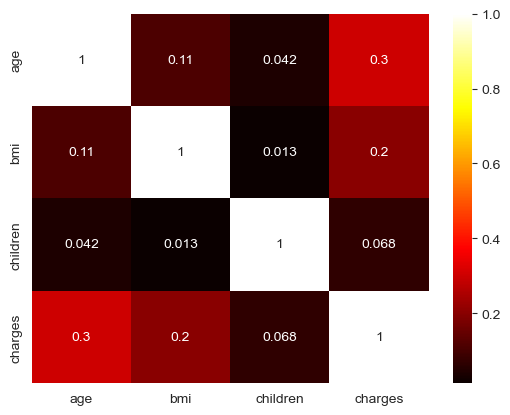

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='hot')

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data["sex"]=lb.fit_transform(data["sex"])
data["smoker"]=lb.fit_transform(data["smoker"])
data["region"]=lb.fit_transform(data["region"])

#### Building a model--

In [22]:
X=data.iloc[:,0:6]
y=data.iloc[:,6]
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test
print("Calling the train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)

def modelling1(X_train,y_train,X_test):
    model1=LinearRegression()
    model1.fit(X_train,y_train)
    print("Model1 training is completed")
    pred1=model1.predict(X_test)
    return pred1

print("Calling the modelling1 function--")
pred1=modelling1(X_train,y_train,X_test)
r2score_MLR=(round(r2_score(y_test,pred1)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred1))
print("Linear Regression--")
print('r2score:',r2score_MLR)
print('RMSE:',rmse)
print('-------------------------------------------')

Calling the train_test function--
(1070, 6)
(1070,)
(268, 6)
(268,)
Calling the modelling1 function--
Model1 training is completed
Linear Regression--
r2score: 75.65
RMSE: 5922.240251999296
-------------------------------------------


In [23]:
def modelling2(X_train,y_train,X_test):
    model2=Lasso()
    model2.fit(X_train,y_train)
    print("Model2 training is completed")
    pred2=model2.predict(X_test)
    return pred2

print("Calling the modelling2 function--")
pred2=modelling2(X_train,y_train,X_test)
r2score_Lasso=(round(r2_score(y_test,pred2)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred2))
print("Lasso Regression--")
print('r2score:',r2score_Lasso)
print('RMSE:',rmse)
print('-------------------------------------------')

Calling the modelling2 function--
Model2 training is completed
Lasso Regression--
r2score: 75.65
RMSE: 5921.766096553198
-------------------------------------------


In [24]:
def modelling3(X_train,y_train,X_test):
    model3=Ridge()
    model3.fit(X_train,y_train)
    print("Model3 training is completed")
    pred3 = model3.predict(X_test)
    return pred3

print("Calling the modelling3 function--")
pred3=modelling3(X_train,y_train,X_test)
r2score_Ridge=(round(r2_score(y_test,pred3)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred3))
print("Ridge Regression--")
print('r2score:',r2score_Ridge)
print('RMSE:',rmse)
print('-------------------------------------------')

Calling the modelling3 function--
Model3 training is completed
Ridge Regression--
r2score: 75.71
RMSE: 5914.889391102591
-------------------------------------------


In [25]:
def modelling4(X_train,y_train,X_test):
    model4=KNeighborsRegressor(weights='distance',n_neighbors=137)
    model4.fit(X_train,y_train)
    print("Model4 training is completed")
    pred4=model4.predict(X_test)
    return pred4

print("Calling the modelling4 function--")
pred4=modelling4(X_train,y_train,X_test)
r2score_KNN=(round(r2_score(y_test,pred4)*100,2))
rmse = m.sqrt(mean_squared_error(y_test,pred4))
print("KNN Regression--")
print('r2score:',r2score_KNN)
print('RMSE:',rmse)

Calling the modelling4 function--
Model4 training is completed
KNN Regression--
r2score: 16.18
RMSE: 10987.272623505754


In [26]:
#To choose k---sqrt(n)
m.sqrt(len(data))

36.578682316343766

In [27]:
#error method
error_rate=[]
for i in range(1,300):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn_train=knn.fit(X_train,y_train)
    pred_i=knn_train.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))

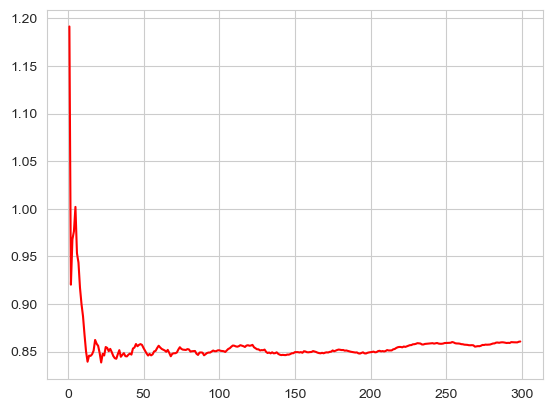

In [28]:
plt.plot(range(1,300),error_rate,color="red")

In [29]:
error_rate

[1.191547619905443,
 0.9202469367091209,
 0.967783801238872,
 0.9763822798597085,
 1.0019579895360864,
 0.9533009745825182,
 0.9434374003706675,
 0.9170406899975707,
 0.8998977878910587,
 0.8870346031605741,
 0.8676393555950219,
 0.8500763466030011,
 0.839256629129598,
 0.8456369132458411,
 0.8454029040324983,
 0.8470732434804642,
 0.8509035891970064,
 0.8621473621519531,
 0.8581768092532749,
 0.8559412041784601,
 0.8484300590862206,
 0.8384783661227755,
 0.8475578506244867,
 0.8458343936514743,
 0.854706718497046,
 0.8537822607893251,
 0.8503281777248306,
 0.8527656104569853,
 0.8493621843482461,
 0.8452936488308633,
 0.8429835977147356,
 0.8424015973875698,
 0.8471748158693486,
 0.851425586536003,
 0.8444559491162171,
 0.8464730634619335,
 0.8482652873386893,
 0.8451264337805267,
 0.844873652605862,
 0.8466683835255394,
 0.8478718567953929,
 0.846757177292037,
 0.8531469670313931,
 0.8541699129273651,
 0.8578690938655604,
 0.8555393034055154,
 0.8569903692194708,
 0.8577742595061562,

In [30]:
details = {
    'Model' : ['Multiple Linear Regression', "Lasso Regression",'Ridge Regression','KNN Regression'],
    ' Accuracy %' : [r2score_MLR, r2score_Lasso,r2score_Ridge,r2score_KNN],}
df = pd.DataFrame(details)
df

,Model,Accuracy %
0,Multiple Linear Regression,75.65
1,Lasso Regression,75.65
2,Ridge Regression,75.71
3,KNN Regression,16.18


Our Model with Ridge Regression is giving highest accuracy of 75.71%.